# Introduction
#### In this analysis, we aim to explore how various factors influence students' performance improvements over time. The primary objective is to predict whether a student's exam score will improve based on a set of characteristics and prior performance metrics. By examining the relationship between these factors and the improvement in exam scores, we can gain insights into the drivers of academic success.

#### Our dataset includes a range of variables such as hours studied, attendance, parental involvement, and previous scores. By analyzing these variables, we seek to identify patterns and factors that contribute to an increase in students' exam scores. This analysis will help us understand which aspects of students' educational experiences have the most significant impact on their academic performance, potentially guiding educational strategies and interventions to enhance student outcomes.

In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('student.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#### Categorical variables need to be converted into numerical values to be used in machine learning models. This is because most machine learning algorithms require numerical input to perform calculations. One effective method for encoding categorical variables is by using the pd.get_dummies function in pandas.

#### The pd.get_dummies function transforms categorical variables into a series of binary (0 or 1) columns, each representing one category. This process is known as one-hot encoding. By applying this method, we can ensure that categorical data is appropriately represented and can be used in predictive modeling.

In [29]:
features = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 
             'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access', 
             'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 
             'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 
             'Parental_Education_Level', 'Distance_from_Home', 'Gender']
target = 'Exam_Score'

#### Define the target variable based on whether the exam score has improved
#### Assume that an improvement is defined as an increase in exam score by at least 5 points

In [30]:
df['Score_Improved'] = (df['Exam_Score'] > df['Previous_Scores'] + 5).astype(int)

In [31]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Score_Improved']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train a Model

#### You can use a classification model, such as Logistic Regression, to predict whether the Exam_Score will improve. Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. In this case, it will help us predict if the exam score of a student will increase based on various features.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [37]:
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)
print("Feature importance (coefficients):")
print(feature_importance)

Feature importance (coefficients):
Distance_from_Home_Near                  0.287460
Peer_Influence_Positive                  0.238179
Distance_from_Home_Moderate              0.219393
Extracurricular_Activities_Yes           0.152133
Gender_Male                              0.104812
Tutoring_Sessions                        0.090106
Motivation_Level_Medium                  0.078084
Teacher_Quality_Medium                   0.057663
Peer_Influence_Neutral                   0.046876
Internet_Access_Yes                      0.045876
Sleep_Hours                              0.032234
Parental_Education_Level_Postgraduate    0.025835
Hours_Studied                            0.024798
Attendance                               0.023547
Physical_Activity                       -0.014093
Motivation_Level_Low                    -0.022473
Access_to_Resources_Medium              -0.076920
Parental_Education_Level_High School    -0.093583
Family_Income_Medium                    -0.101476
Parental_Involv

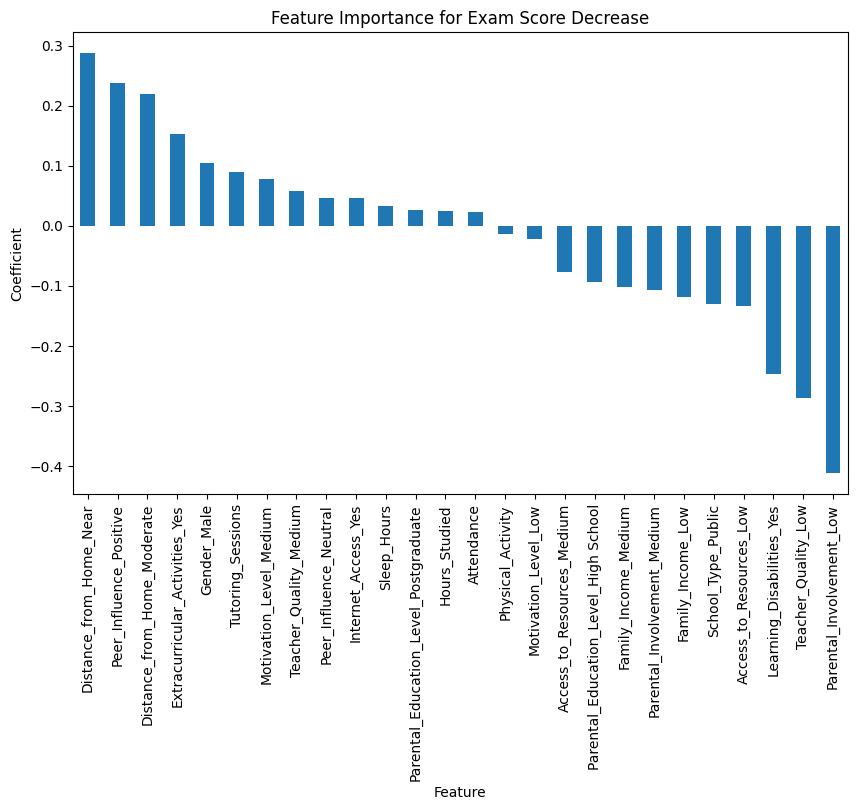

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Exam Score Decrease')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()


#### This analysis suggests that features such as low parental involvement, low teacher quality, and learning disabilities have the strongest negative impact on the likelihood of exam score decrease, while factors like distance from home, positive peer influence, and extracurricular activities tend to have a positive impact on score decrease. These insights can guide targeted interventions to address the factors most influencing academic performance.

### Predict and evaluate

In [33]:
y_pred = model.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1555    0]
 [ 427    1]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1555
           1       1.00      0.00      0.00       428

    accuracy                           0.78      1983
   macro avg       0.89      0.50      0.44      1983
weighted avg       0.83      0.78      0.69      1983



### Conclusion

#### In this analysis, we aimed to explore how various factors influence students' academic performance, specifically focusing on predicting whether a student's exam score would improve based on different characteristics and prior performance metrics.

#### The feature importance analysis revealed that certain variables, such as "Distance_from_Home_Near" and "Peer_Influence_Positive," have a significant positive impact on the likelihood of an improvement in exam scores. Conversely, factors like "Parental_Involvement_Low" and "Learning_Disabilities_Yes" showed a more negative influence, indicating that these aspects may hinder academic progress.

#### The evaluation of the Logistic Regression model provided valuable insights into its performance. While the model demonstrated strong precision in predicting non-improvement scenarios, its recall for identifying improvements was lower. This discrepancy highlights the model's strength in correctly classifying instances where scores did not improve, but suggests opportunities for enhancing its ability to detect actual improvements.

#### Overall, the results underscore the importance of certain educational factors and provide a foundation for further refinement of predictive models. By focusing on the identified key features and exploring additional model improvements, educational strategies can be better aligned to support students in achieving their academic goals.